In [3]:
!pip3 install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Cargar el dataset
data = pd.read_csv('movie_statistic_dataset-2.csv')

X = data[['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $']]
y = data['Worldwide gross $']

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/70/8s5ps_9d1d7406f335q43zs00000gn/T/ipykernel_72615/916065293.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


### RED 1: Unbatched Model

In [5]:
unbatched_model = Sequential([
    Dense(64, input_shape=(6,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

unbatched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mae'], 
    run_eagerly=True
)

unbatched_history = unbatched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)


Epoch 1/200


/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 - 2s - 29ms/step - loss: 54204544564854784.0000 - mae: 113486160.0000 - val_loss: 43552896821755904.0000 - val_mae: 106606328.0000
Epoch 2/200
66/66 - 2s - 26ms/step - loss: 54188910883897344.0000 - mae: 113458512.0000 - val_loss: 43493815251632128.0000 - val_mae: 106495712.0000
Epoch 3/200
66/66 - 2s - 28ms/step - loss: 53767205224972288.0000 - mae: 112747808.0000 - val_loss: 42303447885676544.0000 - val_mae: 104484112.0000
Epoch 4/200
66/66 - 2s - 29ms/step - loss: 48694556790620160.0000 - mae: 105372312.0000 - val_loss: 32700180184694784.0000 - val_mae: 89106872.0000
Epoch 5/200
66/66 - 2s - 27ms/step - loss: 31188345254051840.0000 - mae: 80626536.0000 - val_loss: 14619924794179584.0000 - val_mae: 61678140.0000
Epoch 6/200
66/66 - 2s - 26ms/step - loss: 16340819405438976.0000 - mae: 66150568.0000 - val_loss: 9010714685472768.0000 - val_mae: 55452744.0000
Epoch 7/200
66/66 - 2s - 26ms/step - loss: 12528565631320064.0000 - mae: 59533968.0000 - val_loss: 7308564385234944.0000 - v

### Red 2: Batched Model

In [10]:
red2_model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation="relu"),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compilación del modelo
red2_model.compile(
    optimizer='adam',
    loss='mean_squared_error', 
    metrics=['mae'], 
    run_eagerly=True
)

# Entrenamiento del modelo
red2_history = red2_model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32, 
    verbose=2
)

Epoch 1/100


/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 - 1s - 15ms/step - loss: 54204621874266112.0000 - mae: 113486272.0000 - val_loss: 43553270483910656.0000 - val_mae: 106607248.0000
Epoch 2/100
83/83 - 1s - 14ms/step - loss: 54204432895705088.0000 - mae: 113485992.0000 - val_loss: 43552823807311872.0000 - val_mae: 106606448.0000
Epoch 3/100
83/83 - 1s - 15ms/step - loss: 54202972606824448.0000 - mae: 113483792.0000 - val_loss: 43550281186672640.0000 - val_mae: 106602296.0000
Epoch 4/100
83/83 - 1s - 14ms/step - loss: 54197986149793792.0000 - mae: 113476160.0000 - val_loss: 43543503728279552.0000 - val_mae: 106591376.0000
Epoch 5/100
83/83 - 1s - 14ms/step - loss: 54186746220380160.0000 - mae: 113459048.0000 - val_loss: 43529837142343680.0000 - val_mae: 106569680.0000
Epoch 6/100
83/83 - 1s - 14ms/step - loss: 54166667248271360.0000 - mae: 113428168.0000 - val_loss: 43504767418236928.0000 - val_mae: 106530392.0000
Epoch 7/100
83/83 - 1s - 14ms/step - loss: 54129511486193664.0000 - mae: 113372152.0000 - val_loss: 43459532822675456.

### Red 3: Dropout Model

In [8]:
dropout_model = Sequential([
    Dense(64, input_shape=(6,), activation="relu"),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

dropout_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mae'], 
    run_eagerly=True
)

dropout_history = dropout_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)


Epoch 1/200
66/66 - 1s - 21ms/step - loss: 54204561744723968.0000 - mae: 113486080.0000 - val_loss: 43552737907965952.0000 - val_mae: 106605920.0000
Epoch 2/200
66/66 - 1s - 20ms/step - loss: 54178650207027200.0000 - mae: 113436808.0000 - val_loss: 43445174747004928.0000 - val_mae: 106393256.0000
Epoch 3/200
66/66 - 1s - 21ms/step - loss: 53368636554870784.0000 - mae: 111966648.0000 - val_loss: 40978355985580032.0000 - val_mae: 102111928.0000
Epoch 4/200
66/66 - 1s - 20ms/step - loss: 45510040404099072.0000 - mae: 99923664.0000 - val_loss: 27294227255787520.0000 - val_mae: 79746064.0000
Epoch 5/200
66/66 - 1s - 20ms/step - loss: 24957408564477952.0000 - mae: 72028768.0000 - val_loss: 10030427968372736.0000 - val_mae: 55151148.0000
Epoch 6/200
66/66 - 1s - 20ms/step - loss: 15290456162172928.0000 - mae: 62867108.0000 - val_loss: 7377410563506176.0000 - val_mae: 50856408.0000
Epoch 7/200
66/66 - 1s - 19ms/step - loss: 11264005926551552.0000 - mae: 56094640.0000 - val_loss: 60962857067479

## Resultados

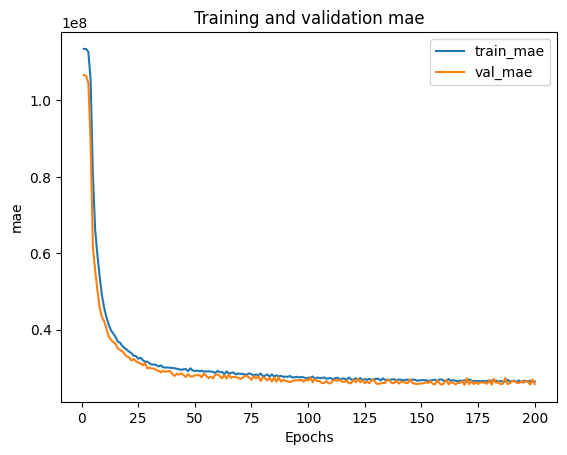

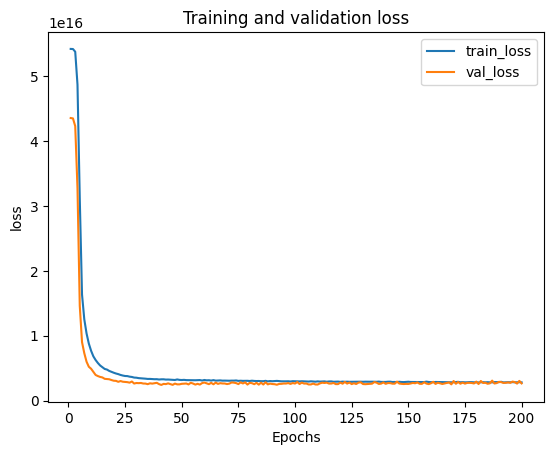

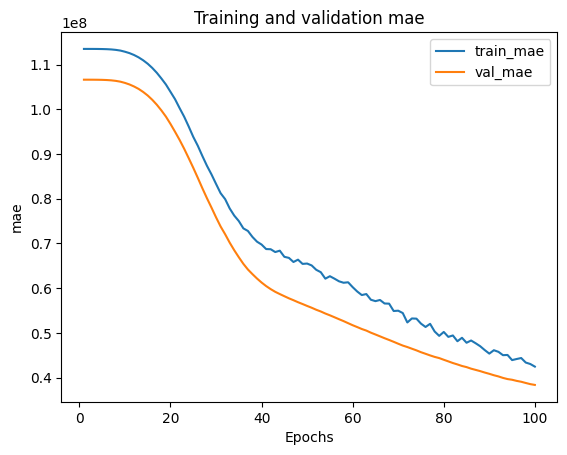

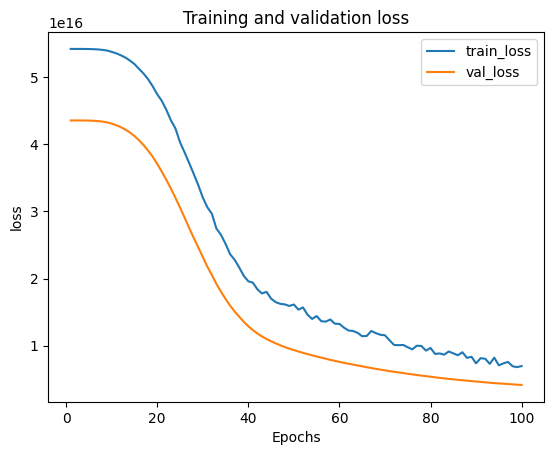

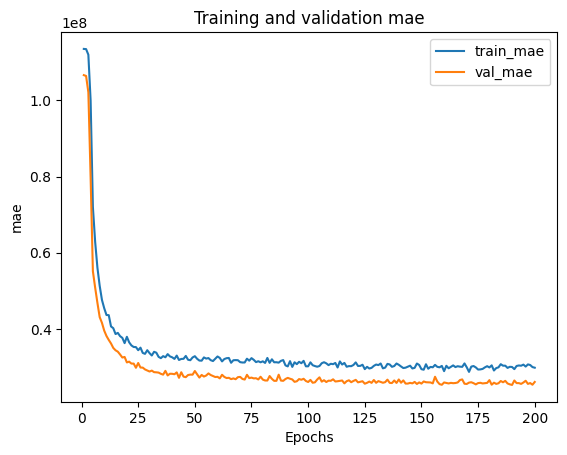

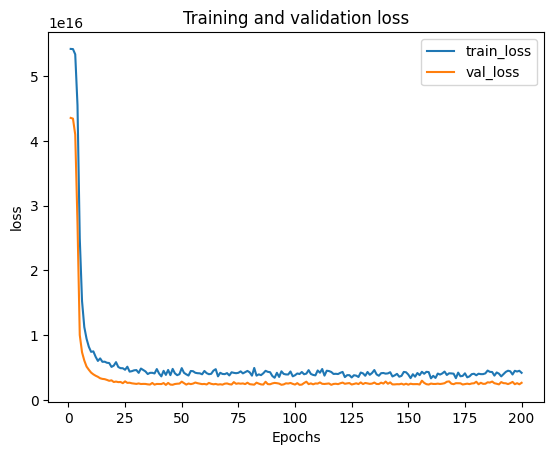

28/28 - 0s - 3ms/step - loss: 4031686337626112.0000 - mae: 30352604.0000
28/28 - 0s - 3ms/step - loss: 6532666195181568.0000 - mae: 43364368.0000
28/28 - 0s - 5ms/step - loss: 4009718922084352.0000 - mae: 30669854.0000
Model Unbatched - MAE: 30352604.0
Model Batched - MAE: 43364368.0
Model Dropout - MAE: 30669854.0


In [12]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, 'val_' + metric])
    plt.show()

# Plot
plot_metric(unbatched_history, 'mae')
plot_metric(unbatched_history, 'loss')

plot_metric(red2_history, 'mae')
plot_metric(red2_history, 'loss')

plot_metric(dropout_history, 'mae')
plot_metric(dropout_history, 'loss')

mae_unbatched = unbatched_model.evaluate(X_test, y_test, verbose=2)
mae_red2 = red2_model.evaluate(X_test, y_test, verbose=2)
mae_dropout = dropout_model.evaluate(X_test, y_test, verbose=2)

print(f"Model Unbatched - MAE: {mae_unbatched[1]}")
print(f"Model Batched - MAE: {mae_red2[1]}")
print(f"Model Dropout - MAE: {mae_dropout[1]}")
